In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv('data/economic_index.csv')

In [41]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [42]:
#drop the unneccessary column
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis = 1, inplace =True)

In [43]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [44]:
#check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

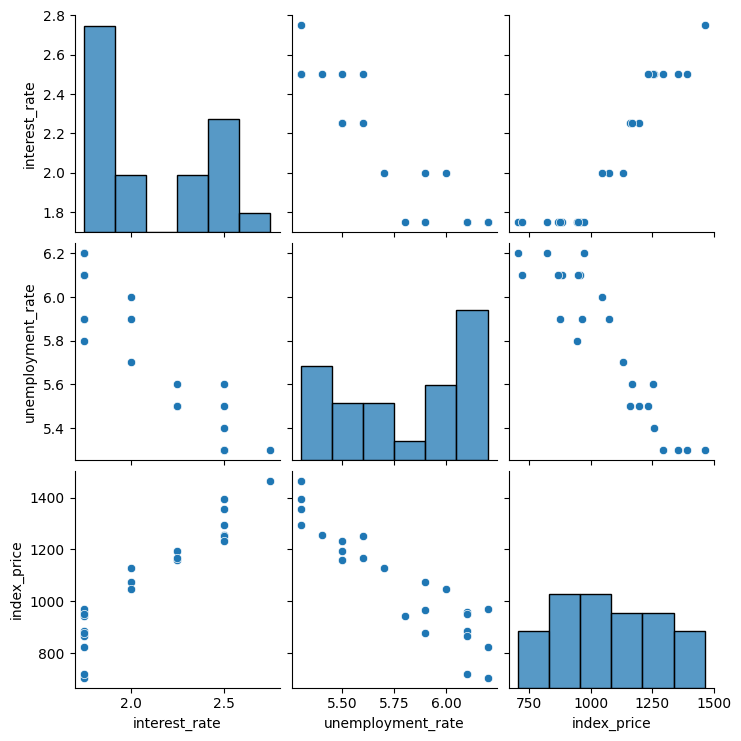

In [45]:
#do some corr visualization
sns.pairplot(df)

In [46]:
#checking correlation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

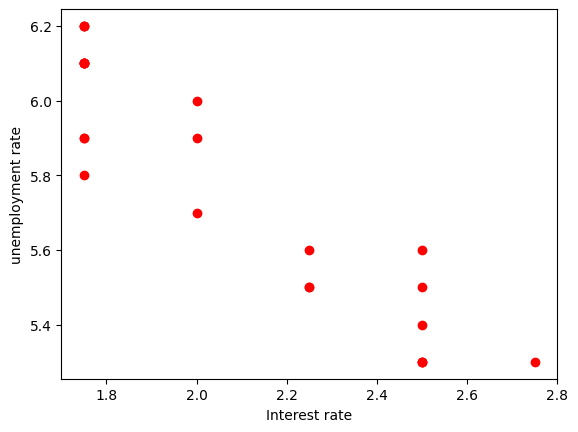

In [47]:
## Visualiza the datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [48]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [49]:
#independent and dependent feature
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [50]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [51]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [52]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

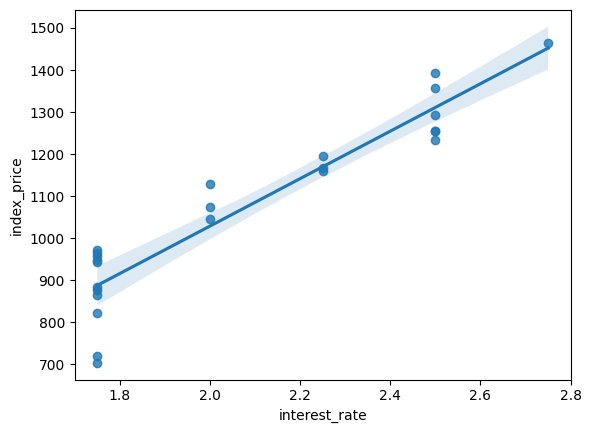

In [53]:
sns.regplot(x= df['interest_rate'],y= df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

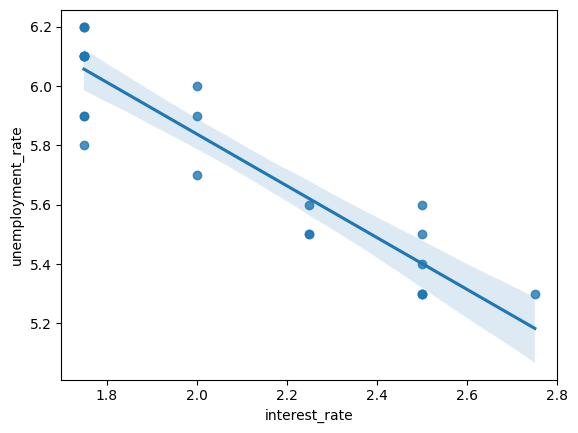

In [54]:
sns.regplot(x= df['interest_rate'],y= df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

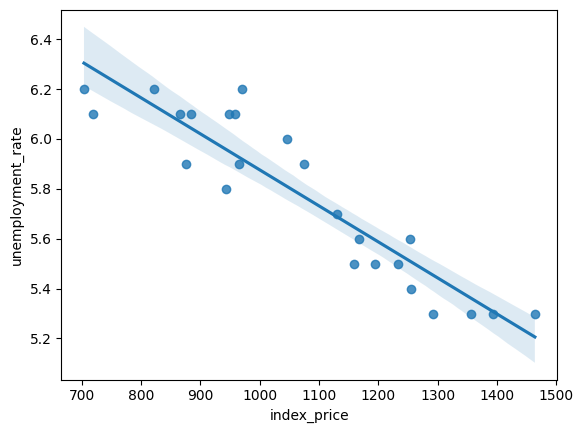

In [55]:
sns.regplot(x= df['index_price'],y= df['unemployment_rate'])

In [56]:
#standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [58]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [59]:
y_train

13     965
1     1394
21     822
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
22     704
17     949
20     876
23     719
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64

In [60]:
from sklearn.linear_model import LinearRegression
regression= LinearRegression()
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
y_pred= regression.predict(X_test)

In [62]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [63]:
##cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train,
                                   scoring='neg_mean_squared_error',
                                    cv= 3 )

In [64]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [65]:
y_pred1= regression.predict(X_test)

In [66]:
y_pred1

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [68]:
#Performance Matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mse= mean_squared_error(y_test, y_pred1)
mae= mean_absolute_error(y_test, y_pred1)
rmse= np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 5793.7628877125835
Mean Absolute Error: 59.9357815232356
Root Mean Squared Error: 76.11677139574815


 ### R square 
 formula= R^2= 1- SSResiduals/SSTotal
 R^2= coefficient of determination SSR = sum of squares of residuals SST = total sum of square


In [69]:
r2= r2_score(y_test, y_pred)

In [70]:
print(f"Model accuracy: {r2}")

Model accuracy: 0.8278978091457141


### Adjusted R square
 - adjusted r2= 1-[((1-R2)*(n-1))/(n-k-1)]
 - R2= The r2 od the model
 - n= the number of observations
 - k= the number of predictor variables



In [71]:
#display adjusted R-squared
adjusted_r2= 1- ((1-r2)* (len(y_test)-1))/ (len(y_test)-X_test.shape[1]-1)
print(f"Adjusted r2: {adjusted_r2}")

Adjusted r2: 0.7131630152428567


### Assumptions

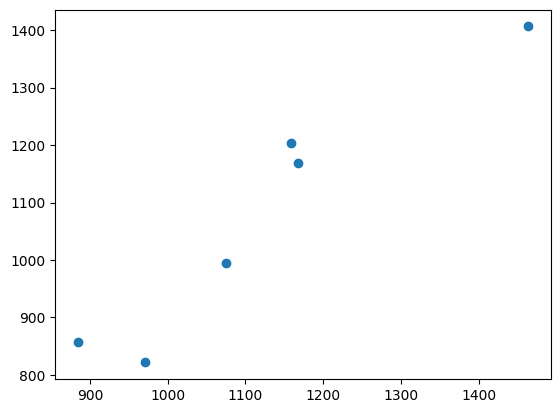

In [72]:
plt.scatter(y_test, y_pred)

In [73]:
residuals = y_test- y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


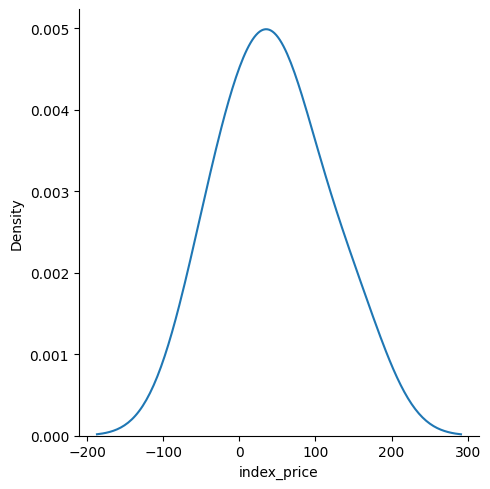

In [74]:
#plot the residuals
sns.displot(residuals, kind= 'kde')

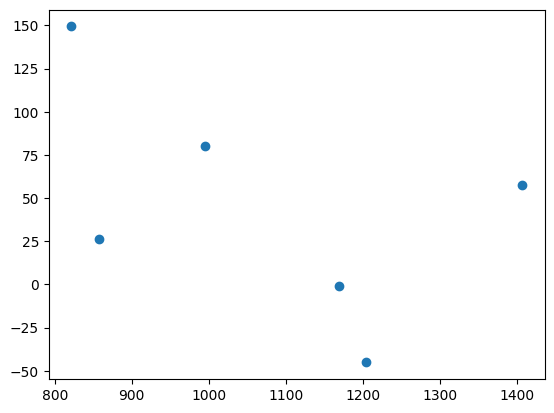

In [75]:
#scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [76]:
#OLS linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 26 Jan 2026   Prob (F-statistic):                       0.754
Time:                        23:51:46   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
print(regression.coef_)

[  88.27275507 -116.25716066]
